In [1]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import pandas as pd

In [2]:
data_kghm = df = pd.read_csv('kgh_d.csv')
data_kghm['Data'] = pd.to_datetime(data_kghm['Data'])
data_kghm.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


In [3]:
data_copper = pd.read_csv('ca_c_f_d.csv')
data_copper['Data'] = pd.to_datetime(data_copper['Data'])
data_copper.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie").

In [4]:
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import subplots

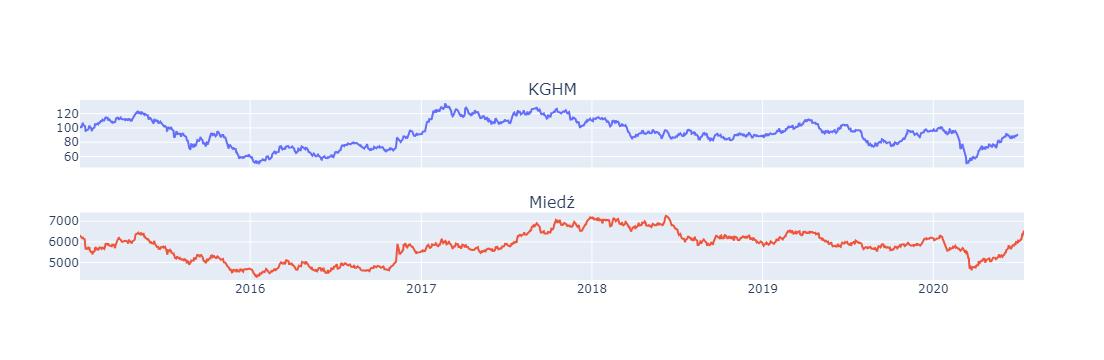

In [5]:
fig = go.Figure()
fig = subplots.make_subplots(rows=2,cols=1,subplot_titles=['KGHM','Miedź'],shared_xaxes=True)
fig.add_trace(go.Scatter(x=data_kghm['Data'],y=data_kghm['Zamkniecie']),1,1)
fig.add_trace(go.Scatter(x=data_copper['Data'],y=data_copper['Zamkniecie']),2,1)
fig.update_layout(showlegend=False)



In [6]:
df1 =pd.merge(data_kghm,data_copper,how='right',on='Data')
df1
merged_data =df1['Zamkniecie_x'].fillna(df1['Zamkniecie_x'].ffill())


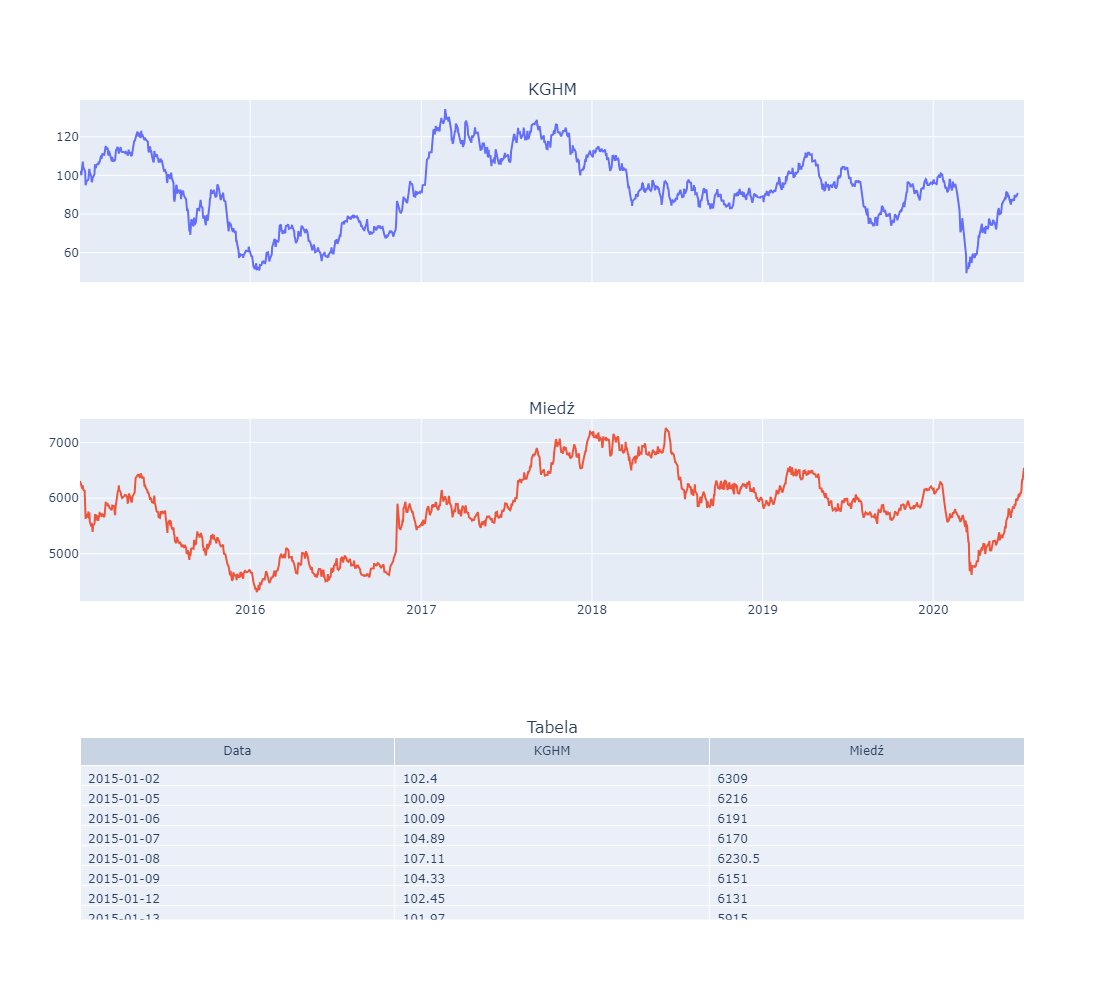

In [8]:
fig = go.Figure()
fig = subplots.make_subplots(rows=3, cols=1, subplot_titles=['KGHM','Miedź','Tabela'] ,shared_xaxes=True,specs=[[{"type": "scatter"}],[{"type": "scatter"}],[{"type": "table"}]])
fig.add_trace(go.Scatter(x=data_kghm['Data'],y=data_kghm['Zamkniecie']),1,1)
fig.add_trace(go.Scatter(x=data_copper['Data'],y=data_copper['Zamkniecie']),2,1)
fig.add_trace(go.Table(header = dict(values = ['Data','KGHM', 'Miedź']), cells = dict(values = [data_copper['Data'].dt.date,merged_data, data_copper['Zamkniecie'] ], align="left"),), 3,1)
fig.update_layout(showlegend=False,width=1000,height=1000)
